We start by importing numpy and pandas

In [ ]:
import pandas as pd
import numpy as np

We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
# Read English sentences into a dataframe
with open('/content/machine_learning_certification/Challenge 7/en.csv', 'r') as file:
    english_sentences = file.readlines()

english = pd.DataFrame({'English Sentences': english_sentences})


In [ ]:
# Read French sentences into a dataframe
with open('/content/machine_learning_certification/Challenge 7/fr.csv', 'r') as file:
    french_sentences = file.readlines()

french = pd.DataFrame({'French Sentences': french_sentences})

**How many sentences does each of the files contain?**

In [ ]:
# Check the number of sentences in the English dataframe
num_english_sentences = english.shape[0]

# Check the number of sentences in the French dataframe
num_french_sentences = french.shape[0]

print(f"Number of sentences in English dataframe: {num_english_sentences}")
print(f"Number of sentences in French dataframe: {num_french_sentences}")

Number of sentences in English dataframe: 137860
Number of sentences in French dataframe: 137860


Now we concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
# Concatenate the two dataframes into 'df' with English and French sentences columns
df = pd.concat([english, french], axis=1)

In [ ]:
import pandas as pd

# Randomly sample 50,000 rows
sampled_df = df.sample(n=10000, random_state=42)

In [ ]:
sampled_df.shape

(10000, 2)

Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
# Rename the columns to 'English' and 'French'
sampled_df.columns = ['English', 'French']

Pick a sentence and print it in both languages

In [ ]:
# Pick a random row from the dataframe
random_row = sampled_df.sample(n=1)

# Extract the English and French sentences from the selected row
english_sentence = random_row['English'].values[0]
french_sentence = random_row['French'].values[0]

# Print the sentences in both languages
print("English: ", english_sentence)
print("French: ", french_sentence)

English:  "he dislikes strawberries , oranges , and pears ."

French:  "il n'aime les fraises , les oranges et les poires ."



##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
import string
import re

# Define a function to remove punctuation from a sentence
def remove_punctuation(text):
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)
    return text

# Apply the remove_punctuation function to the English and French sentence columns
sampled_df['English'] = sampled_df['English'].apply(remove_punctuation)
sampled_df['French'] = sampled_df['French'].apply(remove_punctuation)

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
data ={ 'English' :["she dislikes limes , peaches , and bananas."],
   'French': ["elle déteste citrons verts , les pêches et les bananes ."] }
df2 = pd.DataFrame(data)
df2['English'] = df2['English'].apply(remove_punctuation)
df2['French'] = df2['French'].apply(remove_punctuation)

# Print the sentences without punctuation
for index, row in df2.iterrows():
    print("English: ", row['English'])
    print("French: ", row['French'])

English:  she dislikes limes  peaches  and bananas
French:  elle déteste citrons verts  les pêches et les bananes 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
# Function to count the number of words in a sentence
def count_words(sentence):
    words = sentence.split()
    return len(words)

# Add a column 'ENG Length' to represent the number of words in English sentences
sampled_df['ENG Length'] = sampled_df['English'].apply(count_words)


In [ ]:
# Add a column 'FR Length' to represent the number of words in French sentences
sampled_df['FR Length'] = sampled_df['French'].apply(count_words)

Visualize the distribution of the lengths of english sentences and french sentences.

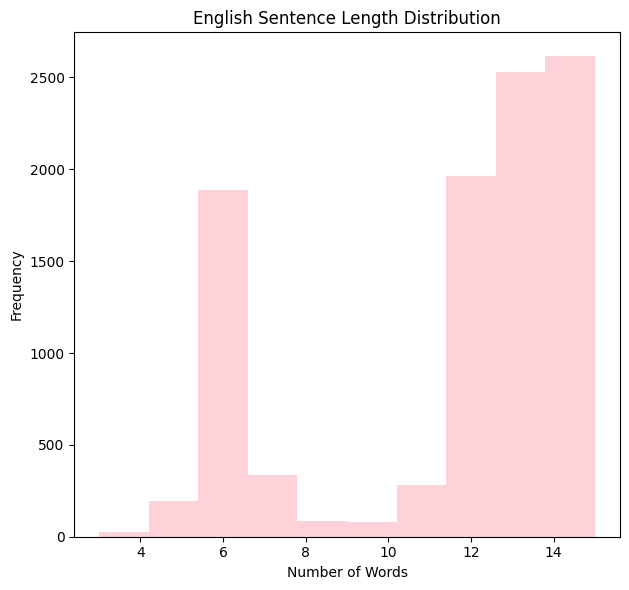

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sampled_df['ENG Length'], bins=10, color='pink', alpha=0.7)
plt.title('English Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

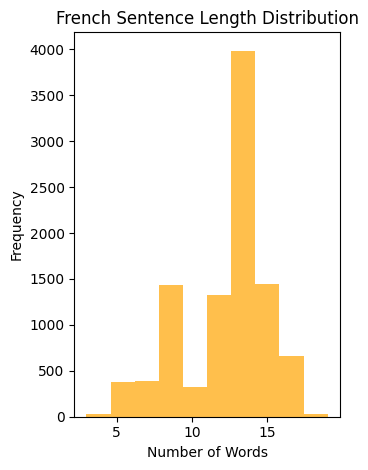

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(sampled_df['FR Length'], bins=10, color='orange', alpha=0.7)
plt.title('French Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
#the maximum length of an English sentence
max_eng_length = sampled_df['ENG Length'].max()

#the maximum length of a French sentence
max_fr_length = sampled_df['FR Length'].max()

print("Maximum length of an English sentence:", max_eng_length)
print("Maximum length of a French sentence:", max_fr_length)

Maximum length of an English sentence: 15
Maximum length of a French sentence: 19


In [ ]:
sampled_df.head()

,English,French,ENG Length,FR Length
108643,china is usually busy during september but it...,chine est généralement occupé en septembre ma...,13,13
130378,he dislikes pears and peaches \n,il aime pas les poires et les pêches \n,5,8
49480,the united states is sometimes rainy during ja...,les étatsunis est parfois pluvieux en janvier ...,14,13
97455,california is mild during march but it is som...,california est doux au mois de mars mais il e...,12,14
50632,he dislikes mangoes and strawberries \n,il naime les mangues et les fraises \n,5,7


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

Tokenize the sentences that we have.

In [ ]:
!pip install transformers


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Initialize a list to store the tokenized words
english_tokens_list = []

for text in sampled_df['English']:
    # Tokenize the sentence into words and append to the list
    english_tokens_list.append(word_tokenize(text))

tokenized_english= english_tokens_list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Initialize a list to store the tokenized words
french_tokens_list = []

for text in sampled_df['French']:
    # Tokenize the sentence into words and append to the list
    french_tokens_list.append(word_tokenize(text))

tokenized_french = french_tokens_list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**How many unique words do we have in english and in french?**

In [ ]:
# Count unique words in English and French
unique_words_english = set([word for tokens in tokenized_english for word in tokens])
unique_words_french = set([word for tokens in tokenized_french for word in tokens])

# Get the number of unique words
num_unique_words_english = len(unique_words_english)
num_unique_words_french = len(unique_words_french)

print(f"Number of unique words in English: {num_unique_words_english}")
print(f"Number of unique words in French: {num_unique_words_french}")

Number of unique words in English: 198
Number of unique words in French: 313


####Padding

Perform padding on the sequences that we have.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_english)  # Fit on your English tokens

# Convert tokens to integer sequences
eng_sequences = tokenizer.texts_to_sequences(tokenized_english)
max_seq_length = 50
# Perform padding on the integer sequences
Padded_English = pad_sequences(eng_sequences, maxlen=max_seq_length, padding='post')


tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(tokenized_french)

# Convert tokens to integer sequences
fr_sequences = tokenizer2.texts_to_sequences(tokenized_french)
max_seq_length = 50
# Perform padding on the integer sequences
Padded_French = pad_sequences(fr_sequences, maxlen=max_seq_length, padding='post')



##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create tokenizers
english_tokenizer = Tokenizer()
french_tokenizer = Tokenizer()

# Fit tokenizers on your training data
english_tokenizer.fit_on_texts(tokenized_english)
french_tokenizer.fit_on_texts(tokenized_french)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense


#unique_words_english = set(token for seq in english_tokenizer for token in seq)
#english_vocab_size = len(unique_words_english) + 1
english_vocab_size = len(english_tokenizer.word_index) + 1
french_vocab_size = len(french_tokenizer.word_index) + 1

#unique_words_french = set(token for seq in french_tokenizer for token in seq)
#french_vocab_size = len(unique_words_french) + 1

# Create the model
model = Sequential()

# Add an embedding layer for the input (English)
model.add(Embedding(input_dim=english_vocab_size, output_dim=128, input_length=max_seq_length , mask_zero=True))

# Add an LSTM layer to process the input sequence
model.add(LSTM(256))

# Repeat the LSTM output to the same sequence length for the decoder
model.add(RepeatVector(max_seq_length))

# Add another LSTM layer for the output (French)
model.add(LSTM(256, return_sequences=True))

# Apply the TimeDistributed layer to output one token at a time
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           25472     
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 repeat_vector (RepeatVecto  (None, 50, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 50, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 50, 313)           80441     
 ributed)                                                        
                                                                 
Total params: 1025465 (3.91 MB)
Trainable params: 102546

In [ ]:
import pickle

# Save the English tokenizer
with open('english_tokenizer.pkl', 'wb') as file:
    pickle.dump(english_tokenizer, file)



In [ ]:

# Save the French tokenizer
with open('french_tokenizer.pkl', 'wb') as file:
    pickle.dump(french_tokenizer, file)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Padded_English, Padded_French, test_size=0.2, random_state=42)

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(Padded_English, Padded_French, epochs=5,  validation_split=0.2, )
history = model.fit(X_train, y_train, epochs=5, batch_size=64 ,validation_data=(X_val, y_val))


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
def translate_english_to_french(input_sentence, model, english_tokenizer, french_tokenizer, max_seq_length):
    # Tokenize and convert the input sentence to integer sequences
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_sequence = pad_sequences(input_sequence, maxlen=max_seq_length, padding='post')
    # Use the model to predict the output sequence
    output_sequence = model.predict(input_sequence)

    # Initialize an empty list to store the predicted words
    french_sentence = []

    # Process the output sequence
    for token in output_sequence[0]:
        word_index = np.argmax(token)
        if word_index == 0:
            break
        word = french_tokenizer.index_word.get(word_index, "<UNKNOWN>")
        french_sentence.append(word)
    # Join the predicted words to form the translated sentence
    return ' '.join(french_sentence)


Test the following sentence

In [ ]:
#input = "she is driving the truck"
input="she is driving the truck"

translated_sentence = translate_english_to_french(input, model, english_tokenizer, french_tokenizer, max_seq_length)

print("Input (English):", input)
print("Translation (French):", translated_sentence)


1/1 [==============================] - 4s 4s/step
Input (English): she is driving the truck
Translation (French): voiture voiture voiture voiture voiture


Trying to improve the model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, RepeatVector, Dense, Attention, Lambda
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Create model2 with Bidirectional LSTM and Attention
def create_model():
    # Define the encoder
    encoder_inputs = tf.keras.layers.Input(shape=(max_seq_length,))
    encoder_embedding = Embedding(input_dim=english_vocab_size, output_dim=128)(encoder_inputs)
    encoder_bilstm = Bidirectional(LSTM(256, return_sequences=True))(encoder_embedding)

    # Define the decoder
    decoder_inputs = tf.keras.layers.Input(shape=(max_seq_length,))
    decoder_embedding = Embedding(input_dim=french_vocab_size, output_dim=128)(decoder_inputs)
    decoder_lstm = LSTM(256, return_sequences=True)(decoder_embedding)
    attention = Attention()([decoder_lstm, encoder_bilstm])
    decoder_concat = tf.keras.layers.Concatenate(axis=-1)([decoder_lstm, attention])

    decoder_dense = Dense(french_vocab_size, activation='softmax')
    decoder_outputs = decoder_dense(decoder_concat)

    # Create the model
    model2 = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    # Print the model summary
    model2.summary()



compile and train the new model.

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model2 on the training data
history = model2.fit(X_train, y_train, epochs=5, batch_size=64 , validation_data=(X_val, y_val))


Define a new function that relies on the new model to make predictions.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_translation(input_sentence, model2, english_tokenizer, french_tokenizer, max_seq_length):
    # Tokenize and convert the input sentence to integer sequences
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_sequence = pad_sequences(input_sequence, maxlen=max_seq_length, padding='post')

    # Use the model to predict the output sequence
    output_sequence = model.predict(input_sequence)

    # Initialize an empty list to store the predicted words
    french_sentence = []

    # Process the output sequence
    for token in output_sequence[0]:
        word_index = np.argmax(token)
        if word_index == 0:
            break
        word = french_tokenizer.index_word.get(word_index, "<UNKNOWN>")
        french_sentence.append(word)

    # Join the predicted words to form the translated sentence
    translated_sentence = ' '.join(french_sentence)

    return translated_sentence


In [ ]:
input = "she is driving the truck"
translated_sentence = predict_translation(input, model2, english_tokenizer, french_tokenizer, max_seq_length)

print("Input (English):", input)
print("Translation (French):", translated_sentence)

1/1 [==============================] - 0s 39ms/step
Input (English): she is driving the truck
Translation (French): elle a conduit camion voiture
